In [1]:
import cv2 as cv
import torch
import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [2]:
# from processed to tensor
train = torch.load(r'D:\!!!data_\MNIST\processed\training.pt')
test = torch.load(r'D:\!!!data_\MNIST\processed\test.pt')
X_train = train[0]
y_train = train[1]
X_test = test[0]
y_test = test[1]

In [3]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [4]:
X_train = X_train.float()
X_test = X_test.float()

In [5]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [6]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

In [ ]:
a = np.arange(10000)
for i in range(100):    
    num = np.random.choice(a, size=None, replace=False)
    digit = X_test[num, :, :].numpy()
    print(y_test[num].numpy())
#     plt.imshow(digit)
#     plt.show()
    cv.imwrite(f"bmp/img_{i}.bmp", digit)

In [110]:
np.savetxt(r'a_7', X_test[0, :, :].numpy().astype(int), fmt='%3d')

In [51]:
cv.imwrite("test_7.bmp", X_test[0, :, :].numpy())

True

In [7]:
# transform into range 0..1
normalize_divider = 255.0
X_train = X_train.reshape([-1, 28 * 28])/normalize_divider
X_test = X_test.reshape([-1, 28 * 28])/normalize_divider

In [109]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [12]:
class MNISTNet2(torch.nn.Module):
    def __init__(self):
        super(MNISTNet2, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, 500)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(500, 100)
        self.ac2 = torch.nn.Sigmoid()
        self.fc3 = torch.nn.Linear(100, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        x = self.ac2(x)
        x = self.fc3(x)
        return x
    
mnist_net = MNISTNet2()

In [13]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3)

In [14]:
epochs = 100
batch_size = 100

test_accuracy_history = []
test_loss_history = []

# X_test = X_test.to(device)
# y_test = y_test.to(device)

for epoch in range(epochs):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes] #.to(device)
        y_batch = y_train[batch_indexes] #.to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy, epoch)
#     print([i.detach().numpy() for i in mnist_net.parameters()][2][0,:5]) 

tensor(0.9290) 0
tensor(0.9506) 1
tensor(0.9616) 2
tensor(0.9649) 3
tensor(0.9725) 4
tensor(0.9756) 5
tensor(0.9767) 6
tensor(0.9778) 7
tensor(0.9794) 8
tensor(0.9805) 9
tensor(0.9783) 10
tensor(0.9813) 11
tensor(0.9824) 12
tensor(0.9824) 13
tensor(0.9798) 14
tensor(0.9799) 15
tensor(0.9820) 16
tensor(0.9774) 17
tensor(0.9809) 18
tensor(0.9787) 19
tensor(0.9818) 20
tensor(0.9836) 21
tensor(0.9827) 22
tensor(0.9770) 23
tensor(0.9811) 24
tensor(0.9816) 25
tensor(0.9805) 26
tensor(0.9827) 27
tensor(0.9832) 28
tensor(0.9837) 29
tensor(0.9833) 30
tensor(0.9836) 31
tensor(0.9834) 32
tensor(0.9800) 33
tensor(0.9835) 34
tensor(0.9835) 35
tensor(0.9836) 36
tensor(0.9839) 37
tensor(0.9839) 38
tensor(0.9839) 39
tensor(0.9830) 40
tensor(0.9834) 41
tensor(0.9828) 42
tensor(0.9831) 43
tensor(0.9836) 44
tensor(0.9834) 45
tensor(0.9836) 46
tensor(0.9834) 47
tensor(0.9842) 48
tensor(0.9835) 49
tensor(0.9839) 50
tensor(0.9837) 51
tensor(0.9835) 52
tensor(0.9835) 53
tensor(0.9839) 54
tensor(0.9836) 55
te

In [15]:
p = [i.detach().numpy() for i in mnist_net.parameters()]

In [17]:
for i, param in enumerate(p):
    j = i//2
    if i%2:
        s = 'b'
        path = r'params/bias/'
        np.savetxt(path + f'b_{j}', param)
    else:
        s = 'w'
        path = r'params/weight/'
        np.savetxt(path + f'w_{j}', param.reshape(param.shape[0] * param.shape[1]))
    print(j, s, param.shape)

0 w (500, 784)
0 b (500,)
1 w (100, 500)
1 b (100,)
2 w (10, 100)
2 b (10,)


In [18]:
(mnist_net.forward(X_test).argmax(dim=1)==y_test).float().mean()

tensor(0.9845)

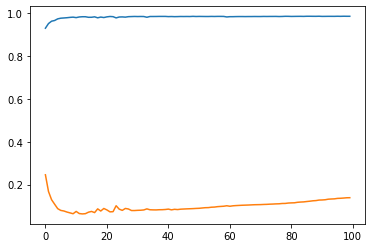

In [19]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history);